<a href="https://colab.research.google.com/github/Danangellotti/Ciencia_de_Datos_UGR_24/blob/main/u4_reg_lineal_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Regresión Lineal Simple**

Es el tipo más simple de regresión. Se utiliza cuando existe una variable independiente y una variable dependiente.

El objetivo es encontrar una línea recta que mejor se ajuste a los datos.

Datos:

https://www.kaggle.com/datasets/altavish/boston-housing-dataset



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Cargamos el dataset de Boston Housing Prices
df = pd.read_csv("/content/sample_data/boston_housing.csv")


In [ ]:
df

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


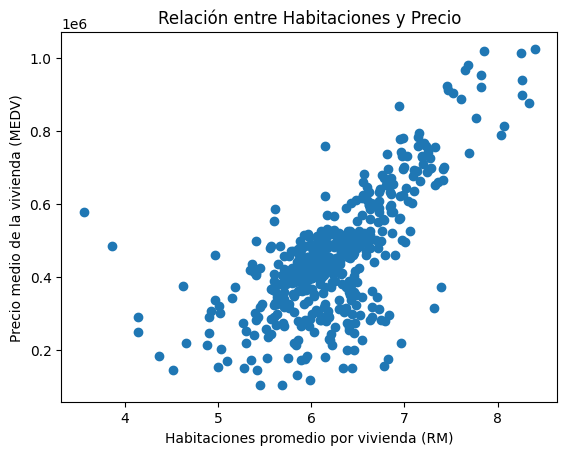

In [ ]:
# Gráfico de dispersión
plt.scatter(df['RM'], df['MEDV'])
plt.xlabel('Habitaciones promedio por vivienda (RM)')
plt.ylabel('Precio medio de la vivienda (MEDV)')
plt.title('Relación entre Habitaciones y Precio')
plt.show()


Cálculo tradicional

In [ ]:
# Definir las variables
X = df['RM']
Y = df['MEDV']

# Calcular las medias
X_mean = np.mean(X)
Y_mean = np.mean(Y)

In [ ]:
# Cálculo manual del coeficiente de Pearson
r_numerator = sum((X - X_mean) * (Y - Y_mean))
r_denominator = np.sqrt(sum((X - X_mean)**2) * sum((Y - Y_mean)**2))
r = r_numerator / r_denominator

print(f'Coeficiente de correlación de Pearson: {r}')

Coeficiente de correlación de Pearson: 0.6972092210185151


Calculo de regresion lineal tradicional

In [ ]:

# Calcular la pendiente (beta_1)
numerator = sum((X - X_mean) * (Y - Y_mean))
denominator = sum((X - X_mean)**2)
beta_1 = numerator / denominator

# Calcular el intercepto (beta_0)
beta_0 = Y_mean - beta_1 * X_mean

# Mostrar la fórmula de la recta ajustada
print(f'La recta de regresión es: Y = {beta_0} + {beta_1}X')

# Predecir valores de Y usando la fórmula
Y_pred = beta_0 + beta_1 * X

La recta de regresión es: Y = -663283.9105825216 + 179098.59189784076X


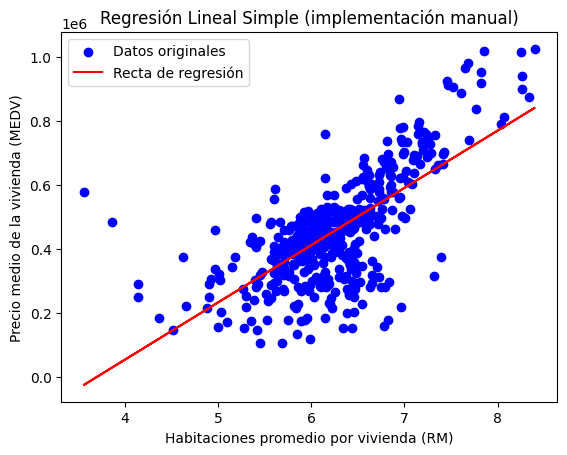

In [ ]:


# Graficar los puntos de datos y la recta de regresión
plt.scatter(X, Y, color='blue', label='Datos originales')
plt.plot(X, Y_pred, color='red', label='Recta de regresión')
plt.xlabel('Habitaciones promedio por vivienda (RM)')
plt.ylabel('Precio medio de la vivienda (MEDV)')
plt.title('Regresión Lineal Simple (implementación manual)')
plt.legend()
plt.show()

In [ ]:
# Cálculo del coeficiente de determinación r2
print(f'Coeficiente de determinación: {r*r}')

Coeficiente de determinación: 0.48610069787324467


Cálculo utilizando scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

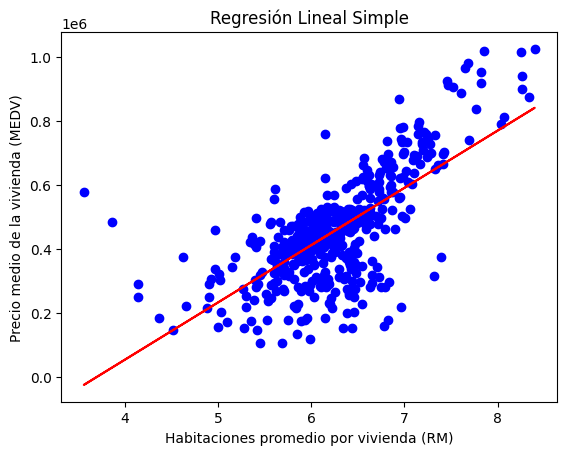

Intercepto: -663283.9105825218
Pendiente: 179098.59189784082
R^2: 0.48610069787324506


In [ ]:
# Definir variables
X = df[['RM']]
y = df['MEDV']

# Ajustar modelo
model = LinearRegression()
model.fit(X, y)

# Visualización
plt.scatter(df['RM'], df['MEDV'], color='blue')
plt.plot(df['RM'], model.predict(X), color='red')
plt.xlabel('Habitaciones promedio por vivienda (RM)')
plt.ylabel('Precio medio de la vivienda (MEDV)')
plt.title('Regresión Lineal Simple')
plt.show()

# Coeficientes y R^2
print(f'Intercepto: {model.intercept_}')
print(f'Pendiente: {model.coef_[0]}')
print(f'R^2: {r2_score(y, model.predict(X))}')